## Co-axial drone dynamics
![](https://d17h27t6h515a5.cloudfront.net/topher/2018/January/5a5fc516_stacked-birotor/stacked-birotor.png)

In this exercise, you will populate the ```CoaxialCopter``` class with three methods. The given functions will calculate the vertical acceleration $\ddot{z}$, angular acceleration $\ddot{\psi}$ along the $z$ axis and angular velocities $\omega_1$ and $\omega_2$ of the propellers in order to achieve any desired vertical acceleration and rotation. We assume that drone only can travel and rotate along the in the vertical $z$ axis. For convenience, we will designate the positive $z$ axis direction downwards. 

In [1]:
%matplotlib inline 
%config InlineBackend.figure_format = 'retina'

import numpy as np 
import math
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import jdc
from ExerciseAnswers import Answers


pylab.rcParams['figure.figsize'] = 10, 10

Each time we initialize the `CoaxialCopter` class will provide the necessary parameters which describe it. The parameters include $k_f$ value of trust coefficient, $k_m$ angular torque coefficient, drone mass $m$ and moment of inertia $I_z$ along the vertical axis. The drone's state can be described by next vector: $X = [z, \psi, \dot{z}, \dot{\psi}]$.

In [2]:
class CoaxialCopter:
    
    def __init__(self, 
                 k_f = 0.1, # value of the thrust coefficient
                 k_m = 0.1, # value of the angular torque coefficient
                 m = 0.5,   # mass of the vehicle 
                 i_z = 0.2, # moment of inertia around the z-axis
                ):
        
        self.k_f = k_f
        self.k_m = k_m
        self.m = m
        self.i_z = i_z
        
        self.omega_1 = 0.0
        self.omega_2 = 0.0
        self.g = 9.81
        
        self.X =np.array([0.0,0.0,0.0,0.0])
        

The acceleration in the along the $z$ axis depends on the vertical component of the total force exerted on the object $\vec{F}_{total}$. The net force consists of the vertical forces generated by the propellers ($\vec{F}_1$ and $\vec{F}_2$) and the force of gravity $m\vec{g}$. The force generated by the propeller is proportional to the square of the angular velocity $||\vec{F}|| = k_f \omega^2$. 

### _Direction:_ 
Write the function that calculates the vertical acceleration of Co-axial copter. 

In [3]:
%%add_to CoaxialCopter

@property
def z_dot_dot(self): 
    # TODO: 
    # 1. Calculate the lift force generated by the first and second propellers 
    # 2. Calculate the total vertical force acting on the drone 
    # 3. Calculate the vertical acceleration due to the total force acting on the drone 
    # keep in mind that the z-axis is directed downward 
    
    f_1 = self.k_f * self.omega_1**2
    f_2 = self.k_f * self.omega_2**2
    f_g = self.m * self.g
    f_total = -f_1 - f_2 + f_g
    
    acceleration = f_total / self.m 
    
    return acceleration 

The angular acceleration is generated by applying torque on the object. In this exercise, we assume that two co-axial propellers generate torques which have only $z$ components. The first propeller rotates clockwise and the second counterclockwise. **Reminder:** The clockwise angular acceleration has the negative value and the counterclockwise angular acceleration has the positive value. Thus be careful with the sign when performing the calculations. 

The torque generated by the propeller is proportional to the torque coefficient and the square of the rotation frequency $\tau = k_m \omega^2$. The total torque is the product of the moment of inertia and the angular acceleration $\tau = I_z \ddot{\psi}$

### _Direction:_
Write the function that calculated the angular acceleration of the co-axial copter. 

In [4]:
%%add_to CoaxialCopter

@property
def psi_dot_dot(self): 
    # TODO: 
    # 1. Calculate the torques generated by both propellers 
    # 2. Calculate the angular acceleration 
    
    cw_torque = self.k_m * self.omega_1 **2
    ccw_torque = self.k_m * self.omega_2 **2
    
    net_torque = ccw_torque - cw_torque
    angular_acc = net_torque / self.i_z
    
    return angular_acc

Controlling the co-axial drone requires setting the angular velocity to the values that will result in desired changes in altitude and the heading. You will include a function which will return the values of $\omega_1$ and $\omega_2$ given the desired vertical and angular acceleration values $\ddot{z}$ and $\ddot{\psi}$.
Just as the reminder our velocities should satisfy the given linear equations.

$$ \ddot{z} = g- \frac{k_f}{m}\left( \omega_1^2 +\omega_2^2 \right)   \\
   \ddot{\psi} =\frac{k_m}{I_z} (-\omega_1^2 + \omega_2^2 )  $$

### _Direction:_ 
Develop the function that has two input variables $\ddot{z}$ and $\ddot{\psi}$ and returns the values of the propeller angular velocities $\omega_1$ and $\omega_2$. **Reminder:** The second propeller rotates counterclockwise thus the angular velocity needs to be positive, while angular velocity of the first propeller needs to be negative as it rotates clockwise.

In [5]:
%%add_to CoaxialCopter

def set_rotors_angular_velocities(self, linear_acc, angular_acc): # Student
    # TODO:
    # 1. Calculate the angular velocities of the propellers to achieve the desired linear and angular accelerations. 
    
    term_1 = self.m * (-linear_acc + self.g) /(2 * self.k_f)
    term_2 = self.i_z * angular_acc/(2 * self.k_m)
    
    omega_1 = -math.sqrt(term_1 + term_2)
    omega_2 = math.sqrt(term_1 - term_2)
    
    self.omega_1 = omega_1
    self.omega_2 = omega_2
    
    return self.omega_1, self.omega_2

Before executing one-dimensional flight using co-axial copter we need to check that functions developed above produce a correct answer. Thus let us run through a series of cases and see if your answers coincide with ours. 

1. Let's calculate the rotor angular velocities which will result in stable hover without any angular rotation. 
2. After knowing the rotor values, we can increase thrust by 10% which will result in positive vertical acceleration _Change of angular velocities of the propellers by $\sqrt{1.1}$._
3. Also, let us increase the first propeller angular velocity by $\sqrt{1.1}$ and decrease the angular velocity of the second one by $\sqrt{0.9}$ lets see what will be the resulting angular acceleration. 

Initialize the co-axial drone.

In [6]:
bi=CoaxialCopter()

1 Obtaining the angular velocities for stable flight.

In [7]:
stable_omega_1,stable_omega_2 = bi.set_rotors_angular_velocities(0.0, 0.0)
print('Drone achieves stable hover by the angular velocity of %5.2f'%stable_omega_1, 
      'for the first propeller and the %5.2f'%stable_omega_2, 'for the second propeller.')

Answers.angular_velocities(bi.m, bi.g, bi.i_z, bi.k_f, bi.k_m, 0.0, 0.0, stable_omega_1, stable_omega_2)

Drone achieves stable hover by the angular velocity of -4.95 for the first propeller and the  4.95 for the second propeller.


'You calculated correct values'

 2 Checking the linear acceleration value.

In [8]:
bi.omega_1 = stable_omega_1 * math.sqrt(1.1)
bi.omega_2 = stable_omega_2 * math.sqrt(1.1)

vertical_acceleration = bi.z_dot_dot
print('Increase in %5.2f'%math.sqrt(1.1),' of the propeller angular velocity will result in'
      ,'%5.2f'%vertical_acceleration, 'm/(s*s) vertical acceleration.' )

Answers.linear_acceleration(bi.m, bi.g, bi.k_f, bi.omega_1, bi.omega_2, vertical_acceleration)

Increase in  1.05  of the propeller angular velocity will result in -0.98 m/(s*s) vertical acceleration.


'You calculated the acceleration value correctly'

3 Checking angular acceleration values

In [9]:
bi.omega_1 = stable_omega_1 * math.sqrt(1.1)
bi.omega_2 = stable_omega_2 * math.sqrt(0.9)

ang_acceleration = bi.psi_dot_dot
print('Increase in %5.2f'%math.sqrt(1.1),' of the angular velocity for the first propellr and',
      ' decrease of the angular velocity of the second propellr by %f.2f'%math.sqrt(0.9),' will result in',
      '%5.2f'%ang_acceleration, 'rad/(s*s) angular acceleration.' )

Answers.angular_acceleration(bi.i_z, bi.k_m, bi.omega_1, bi.omega_2, ang_acceleration)

Increase in  1.05  of the angular velocity for the first propellr and  decrease of the angular velocity of the second propellr by 0.948683.2f  will result in -2.45 rad/(s*s) angular acceleration.


'You calculated the angular acceleration correctly'

---
# Programming exercise 2
---
### Change of state in time.

The state of our co-axial drone can be represented as an array of values $X = (z,\psi,\dot{z},\dot{\psi})$. The time derivative of the state vector will be $\dot{X} = (\dot{z},\dot{\psi},\ddot{z}, \ddot{\psi})$, where $\dot{z}$ is an vertical velocity and $\dot{\psi}$ is a angular velocity of the drone along the $z$ axis. Change in vertical position is equal of vertical velocity at time $t$ times the $dt$ interval of time by which we would like to advance the state $z(t+dt) = z(t) + \dot{z}(t) \cdot dt $. In the same fashion the change of the vertical velocity is equal to vertical acceleration value at time $t$ times the $dt$  time interval $\dot{z}(t +dt)= \dot{z}(t) + \ddot{z} \cdot dt$.


The angular information of any object updates in time in tha same way $\psi(t+dt)=\psi(t) + \dot{\psi} \cdot dt$ and $\dot{\psi}(t+dt) = \dot{\psi}(t) + \ddot{\psi} \cdot dt$.


The next function that we develop will return the state vector which has been advanced by $dt$ time. 

### _Direction:_ 
Implement the method that will calculate the state vector $X$ after $dt$ time advance. 


In [11]:
%%add_to CoaxialCopter

def advance_state(self, dt):
    # TODO:
    # Calculate state vector after dt time 
    
    X_dot =np.array([self.X[2], self.X[3], self.z_dot_dot, self.psi_dot_dot])

    # Change in state will be 
    self.X = self.X + X_dot * dt
    
    return self.X 
    
    

Creating the time array from 0 to 2.0 with a time step of 0.1.

In [12]:
t=np.linspace(0.0,2.0,21)

As an example consider then the drone will accelerate with $0.1g$ vertically up for a one second and then will de-accelerate by $0.1g$ for the same time to come in the complete stop. Thus we will provide power-up for $0 \le t < 1.0$ and power-down for $1.0 \le t < 2.0$.

In the given cell we will set propeller angular velocity to $\sqrt{1.1}$ above the required value for holding a stable hight, Thus achieving the upward acceleration of $0.1g$. One can easily guess that in order to deaccelerate by $0.1g$ we need to set propeller angular velocity to $\sqrt{0.9}$ below the value which is required for holding a stable hight.

We can use the ```advance_state(dt)``` function to calculate the state vector for each time.


In [16]:
bi.X = np.array([0.0,0.0,0.0,0.0])
drone_state_history = bi.X
dt = 0.1

for i in range(0,t.shape[0]-1):
    
    if t[i]<0.99:
        bi.omega_1 = stable_omega_1 * math.sqrt(1.1)
        bi.omega_2 = stable_omega_2 * math.sqrt(1.1)
        drone_state=bi.advance_state(dt)
        
        # generate a history of vertical positions for drone
        drone_state_history = np.vstack((drone_state_history, drone_state))
        
        
    if t[i]>0.99:
        bi.omega_1 = stable_omega_1 * math.sqrt(0.9)
        bi.omega_2 = stable_omega_2 * math.sqrt(0.9)
        drone_state=bi.advance_state(dt)
        
        # generate a history of vertical positions for drone
        drone_state_history = np.vstack((drone_state_history,drone_state))
    

The vertical velocity of the drone is the time integral of the acceleration $\dot{z} = \int \ddot{z} dt$, and it is the third element in state vector $X$. 

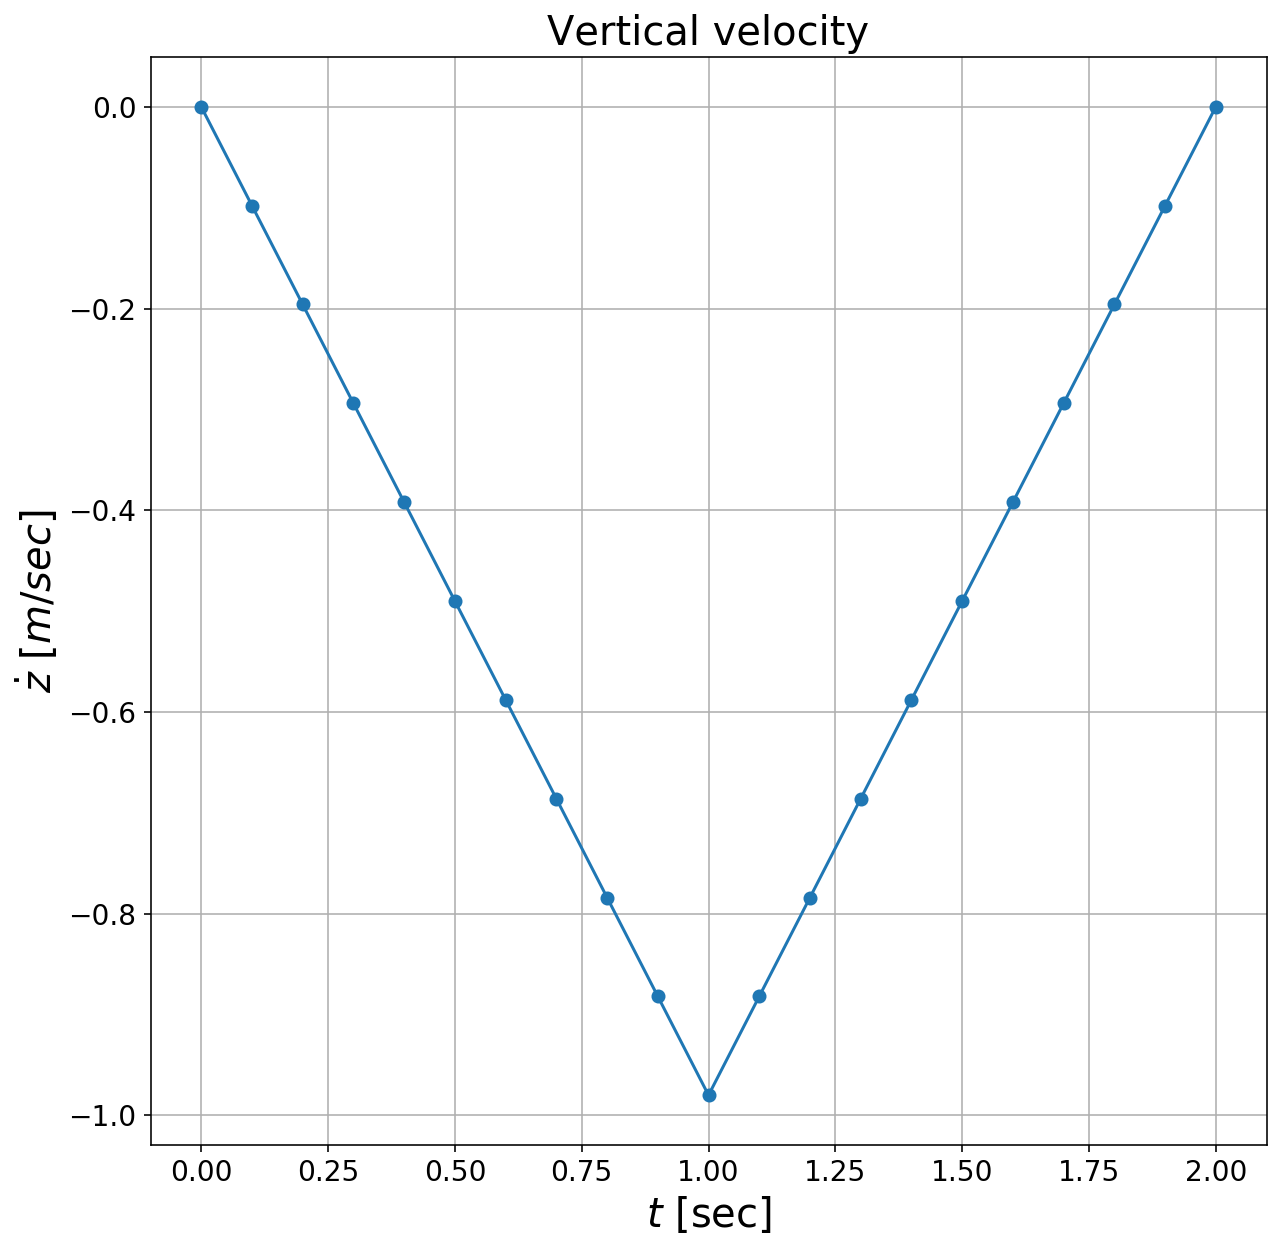

In [17]:
plt.plot(t,drone_state_history[:,2],linestyle='-',marker='o')
plt.grid()
plt.title('Vertical velocity').set_fontsize(20)
plt.xlabel('$t$ [sec]').set_fontsize(20)
plt.ylabel('$\dot{z}$ [$m/sec$]').set_fontsize(20)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.show()

Similarly, the chance in the vertical position if the integral of the velocity over time $z-z_0 = \int \dot{z} dt$.

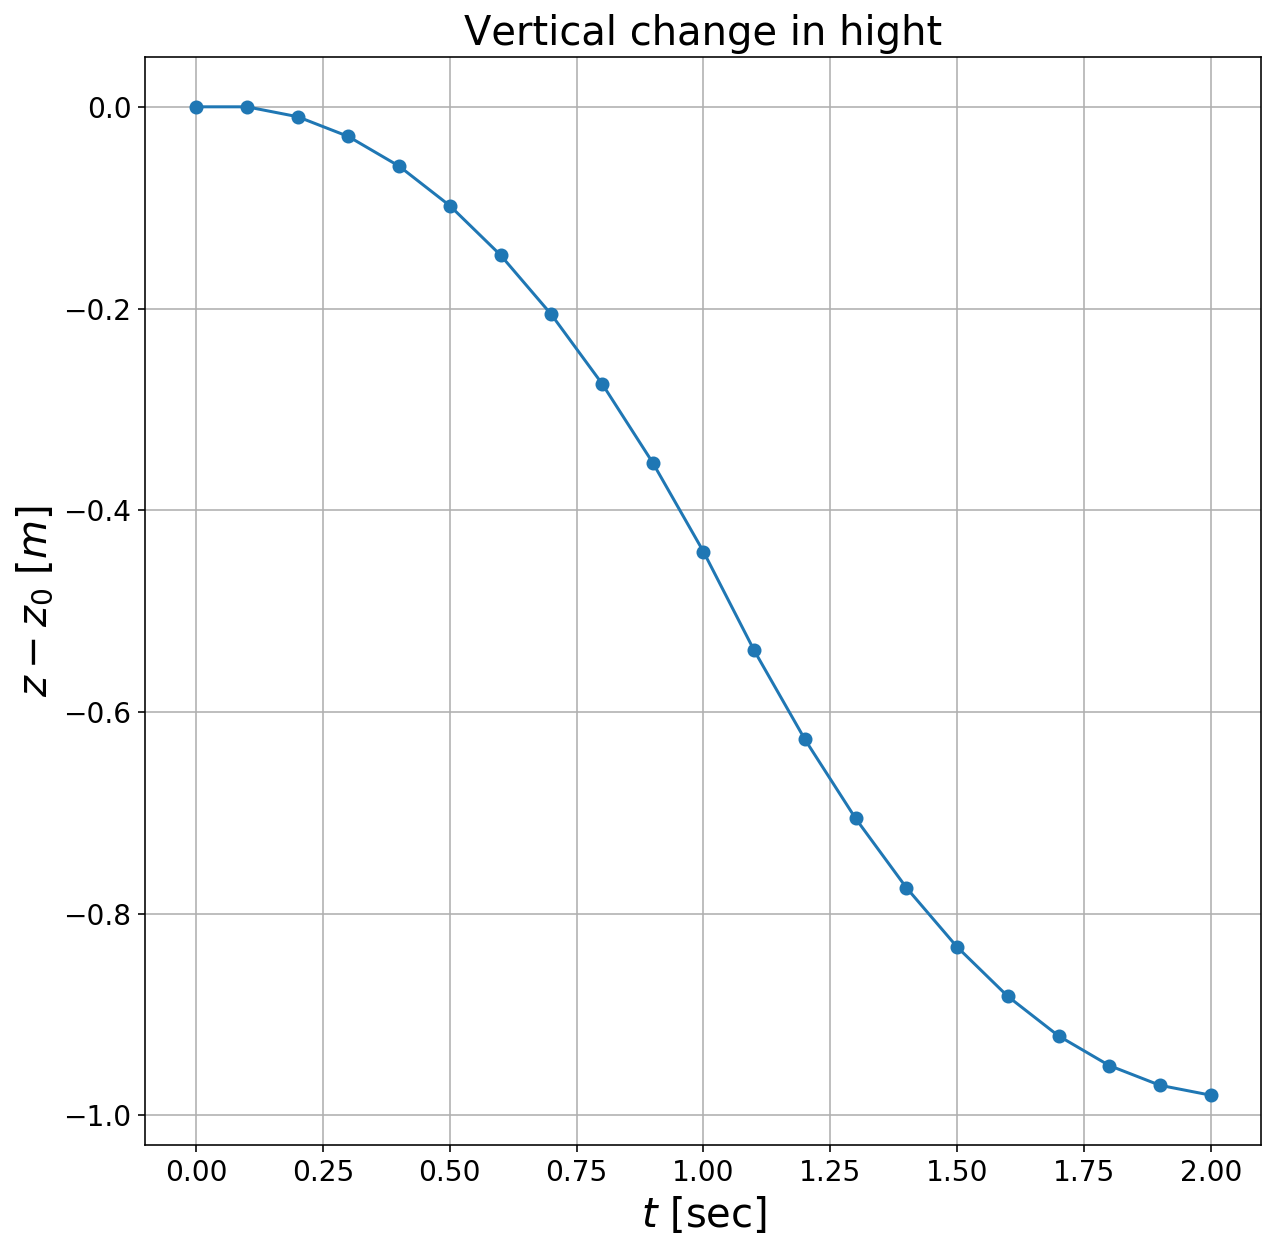

In [18]:
plt.plot(t,drone_state_history[:,0],linestyle='-',marker='o')
plt.grid()
plt.title('Vertical change in hight').set_fontsize(20)
plt.xlabel('$t$ [sec]').set_fontsize(20)
plt.ylabel('$z-z_0$ [$m$]').set_fontsize(20)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.show()